In [1]:
'''
Вам предоставлен файл search_data.parquet - данные по результатам парсинга поисковой выдачи маркетплейса
по более чем 100 различным поисковым запросам, в разных регионах, за один день.
Выполните все пункты, используя Python, и сохраните файл ipynb с указанием фамилии в названии.
ВАЖНО: Просто графика или мнения недостаточно - покажите, как вы пришли к выводу через код и данные.

Дополнительные комментарии:
Выдача - позиция товара в поисковой выдаче по "Запросу".
Например, если у товара Выдача = 1 по Запросу "apple iphone 11 pro чехол" - это означает,
что при поиске такого запроса на маркетплейсе этот товар был показан первым
Номенклатура - уникальный ID товара
Реклама - флаг, включена ли реклама у товара
Стоимость рекламы, Позиция с рекламой, Позиция до рекламы - в исходнике - ненулевые только для товаров, у которых включена реклама
'''

'\nВам предоставлен файл search_data.parquet - данные по результатам парсинга поисковой выдачи маркетплейса\nпо более чем 100 различным поисковым запросам, в разных регионах, за один день. \nВыполните все пункты, используя Python, и сохраните файл ipynb с указанием фамилии в названии.\nВАЖНО: Просто графика или мнения недостаточно - покажите, как вы пришли к выводу через код и данные.\n\nДополнительные комментарии:\nВыдача - позиция товара в поисковой выдаче по "Запросу".\nНапример, если у товара Выдача = 1 по Запросу "apple iphone 11 pro чехол" - это означает,\nчто при поиске такого запроса на маркетплейсе этот товар был показан первым \nНоменклатура - уникальный ID товара\nРеклама - флаг, включена ли реклама у товара \nСтоимость рекламы, Позиция с рекламой, Позиция до рекламы - в исходнике - ненулевые только для товаров, у которых включена реклама\n'

# 1. Обработка данных

In [2]:
# Установка необходимых библиотек
!pip install pyarrow
import pandas as pd
import pyarrow.parquet as pq
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Считывание данных
df = pd.read_parquet('search_data.parquet')

df.tail()

,Дата парсинга,Выдача,Номенклатура,Рейтинг,Отзывы,Цена,Стоимость рекламы,Позиция с рекламой,Позиция до рекламы,Регион,Новинка,Модель,Запрос,Акция,Бренд,Название,Реклама,Остатки,Тип рекламы
1572064,2025-09-12,300,528780128,0.0,0,13446,0,0,0,Новосибирск,Да,iPhone XR в корпусе,чехол на iphone xr в корпусе 16 pro,None,Phone Talk,"iPhone XR в корпусе 16 Pro 256 ГБ, белый Восст...",None,склад продавца Вешки:100;,None
1572065,2025-09-12,300,420345816,4.8,13,351,0,0,0,Новосибирск,None,iPhone XR,чехол на iphone икс эр,None,SCDesign,Чехол на iPhone XR с самолетиками,None,склад продавца Внуково:100;,None
1572066,2025-09-12,300,412056547,5.0,1,274,0,0,0,Новосибирск,None,iPhone 7/8/SE 2020/SE 2022,чехол на iphone се2020,СКИДКИ ПОСПЕЛИ,Case Place,Чехол на iPhone 7 8 SE 2020 SE 2022 с принтом,None,склад продавца СЦ Новосибирск Докучаева:20;,None
1572067,2025-09-12,300,362021637,5.0,1,372,0,0,0,Новосибирск,None,iPhone 7/8/SE 2020/SE 2022,чехол на iphone семь,None,Аксессуары для гаджетов Mobi711,Чехол с отделом для карт для iPhone 7,None,склад продавца Казань:5;,None
1572068,2025-09-12,300,402675011,0.0,0,647,0,0,0,Новосибирск,None,iPhone 7/8/SE 2020/SE 2022,чехол на iphone семь для девочек,None,Sh-store,Чехол на iPhone 7 с сердечками,None,Склад продавца СЦ Смоленск 2 :20;,None


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572069 entries, 0 to 1572068
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Дата парсинга       1572069 non-null  object 
 1   Выдача              1572069 non-null  int64  
 2   Номенклатура        1572069 non-null  int64  
 3   Рейтинг             1572069 non-null  float64
 4   Отзывы              1572069 non-null  int64  
 5   Цена                1572069 non-null  int64  
 6   Стоимость рекламы   1572069 non-null  int64  
 7   Позиция с рекламой  1572069 non-null  int64  
 8   Позиция до рекламы  1572069 non-null  int64  
 9   Регион              1572069 non-null  object 
 10  Новинка             67299 non-null    object 
 11  Модель              1572069 non-null  object 
 12  Запрос              1572069 non-null  object 
 13  Акция               642488 non-null   object 
 14  Бренд               1572069 non-null  object 
 15  Название       

1) Из поля "Остатки": извлеките числа и просуммируйте, результат должен появиться в новой колонке "stock_total", старую колонку удалить

In [5]:
def total_sum(i):
  # так как значений в колонке "Остатки" меньше, чем строк в таблице, проверяем на Nan
  if pd.isna(i) or i == '':
    return 0

  # ищу все числа в ячейке, после двоеточия
  numbers = re.findall(r':(\d+)', i)

  # если в numbers пусто - возвращаем 0
  if not numbers:
        return 0

  # если нет, подсчитываем сумму
  sum_numbers = 0
  for number_string in numbers:
        sum_numbers += int(number_string)

  return sum_numbers

df['stock_total'] = df['Остатки'].apply(total_sum)
df = df.drop('Остатки', axis=1)

df.head()

,Дата парсинга,Выдача,Номенклатура,Рейтинг,Отзывы,Цена,Стоимость рекламы,Позиция с рекламой,Позиция до рекламы,Регион,Новинка,Модель,Запрос,Акция,Бренд,Название,Реклама,Тип рекламы,stock_total
0,2025-09-12,1,172706235,4.9,223,316,2151,1,444,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол,СКИДКИ ПОСПЕЛИ,MagicCase,Силиконовый чехол на iPhone 11 Pro с защитой к...,Да,поиск,53
1,2025-09-12,1,481174536,0.0,0,350,0,0,0,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол pinterest,СКИДКИ ПОСПЕЛИ,CHEHOO,Чехол на iPhone 11 Pro с драконом,None,None,29
2,2025-09-12,1,287575556,4.0,1,428,0,0,0,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол y2k,None,RR CASE,Чехол на IPHONE 11 PRO силиконовый с принтом y2k,None,None,50
3,2025-09-12,1,439036487,4.2,9,369,280,1,26,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол Россия,СКИДКИ ПОСПЕЛИ,Cases_Sores_,Чехол на iPhone 11 Pro с принтом черный Герб,Да,поиск,34
4,2025-09-12,1,189604363,5.0,3,403,0,0,0,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол аниме,None,Street fox ^.^,Чехол на iPhone 11 Pro с принтом Аниме,None,None,9


2) Добавьте новый признак: уровень рейтинга (низкий / средний / высокий). Меньше 3.5 - низкий, больше 4.5 - высокий, всё остальное - средний. Результат должен появиться в новой колонке "level_rating", старую колонку нужно оставить

In [6]:
df['level_rating'] = df['Рейтинг'].apply(
    lambda rank: 'низкий' if rank < 3.5 else 'высокий' if rank > 4.5 else 'средний')
df.head()

,Дата парсинга,Выдача,Номенклатура,Рейтинг,Отзывы,Цена,Стоимость рекламы,Позиция с рекламой,Позиция до рекламы,Регион,Новинка,Модель,Запрос,Акция,Бренд,Название,Реклама,Тип рекламы,stock_total,level_rating
0,2025-09-12,1,172706235,4.9,223,316,2151,1,444,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол,СКИДКИ ПОСПЕЛИ,MagicCase,Силиконовый чехол на iPhone 11 Pro с защитой к...,Да,поиск,53,высокий
1,2025-09-12,1,481174536,0.0,0,350,0,0,0,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол pinterest,СКИДКИ ПОСПЕЛИ,CHEHOO,Чехол на iPhone 11 Pro с драконом,None,None,29,низкий
2,2025-09-12,1,287575556,4.0,1,428,0,0,0,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол y2k,None,RR CASE,Чехол на IPHONE 11 PRO силиконовый с принтом y2k,None,None,50,средний
3,2025-09-12,1,439036487,4.2,9,369,280,1,26,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол Россия,СКИДКИ ПОСПЕЛИ,Cases_Sores_,Чехол на iPhone 11 Pro с принтом черный Герб,Да,поиск,34,средний
4,2025-09-12,1,189604363,5.0,3,403,0,0,0,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол аниме,None,Street fox ^.^,Чехол на iPhone 11 Pro с принтом Аниме,None,None,9,высокий


3) Заменить нули в колонках "Позиция с рекламой", "Позиция до рекламы" на значение из колонки "Выдача"

In [7]:
df['Позиция с рекламой'] = df['Позиция с рекламой'].where(df['Позиция с рекламой'] != 0, df['Выдача'])
df['Позиция до рекламы'] = df['Позиция до рекламы'].where(df['Позиция до рекламы'] != 0, df['Выдача'])
df.head()

,Дата парсинга,Выдача,Номенклатура,Рейтинг,Отзывы,Цена,Стоимость рекламы,Позиция с рекламой,Позиция до рекламы,Регион,Новинка,Модель,Запрос,Акция,Бренд,Название,Реклама,Тип рекламы,stock_total,level_rating
0,2025-09-12,1,172706235,4.9,223,316,2151,1,444,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол,СКИДКИ ПОСПЕЛИ,MagicCase,Силиконовый чехол на iPhone 11 Pro с защитой к...,Да,поиск,53,высокий
1,2025-09-12,1,481174536,0.0,0,350,0,1,1,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол pinterest,СКИДКИ ПОСПЕЛИ,CHEHOO,Чехол на iPhone 11 Pro с драконом,None,None,29,низкий
2,2025-09-12,1,287575556,4.0,1,428,0,1,1,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол y2k,None,RR CASE,Чехол на IPHONE 11 PRO силиконовый с принтом y2k,None,None,50,средний
3,2025-09-12,1,439036487,4.2,9,369,280,1,26,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол Россия,СКИДКИ ПОСПЕЛИ,Cases_Sores_,Чехол на iPhone 11 Pro с принтом черный Герб,Да,поиск,34,средний
4,2025-09-12,1,189604363,5.0,3,403,0,1,1,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол аниме,None,Street fox ^.^,Чехол на iPhone 11 Pro с принтом Аниме,None,None,9,высокий


4. Визуализируйте распределение и очистите данные от выбросов по колонкам: "Цена", "Рейтинг". Объясните свой метод избавления от выбросов

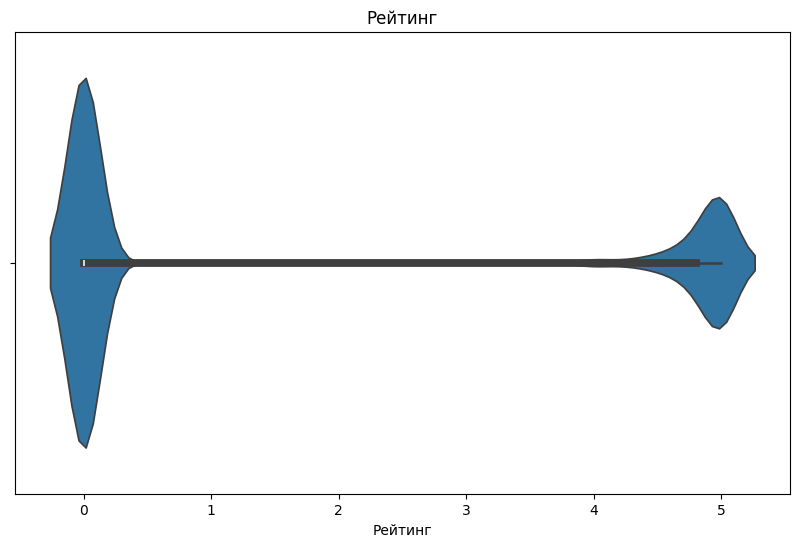

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Рейтинг'])
plt.title('Рейтинг')
plt.show()

In [9]:
# Посмотрим сколько товаров есть с рейтингом 0
zero = (df['Рейтинг'] == 0).sum()
total_products = len(df)

print(f"Товаров с рейтингом 0: {zero}")
print(f"Это {zero/total_products*100:1f}% от всех товаров")
print(f"Минимальный рейтинг выше нуля: {df[df['Рейтинг'] > 0]['Рейтинг'].min()}")

Товаров с рейтингом 0: 1042916
Это 66.340345% от всех товаров
Минимальный рейтинг выше нуля: 1.0


Ожидаемо, на графике рейтинга отсутствуют выбросы, так как система оценки пятизвездочная. Межквартильный размах начинается с 0, что логично, учитывая, что у многих новых товаров просто нет отзывов (предполагаю, что сами покупатели не могут ставить 0 звезд). Для просмотра адекватной статистики по оценкам покупателей, необходимо убрать эти нули.

Основная часть покупателей ставит оценки от  4.8  до  5.0


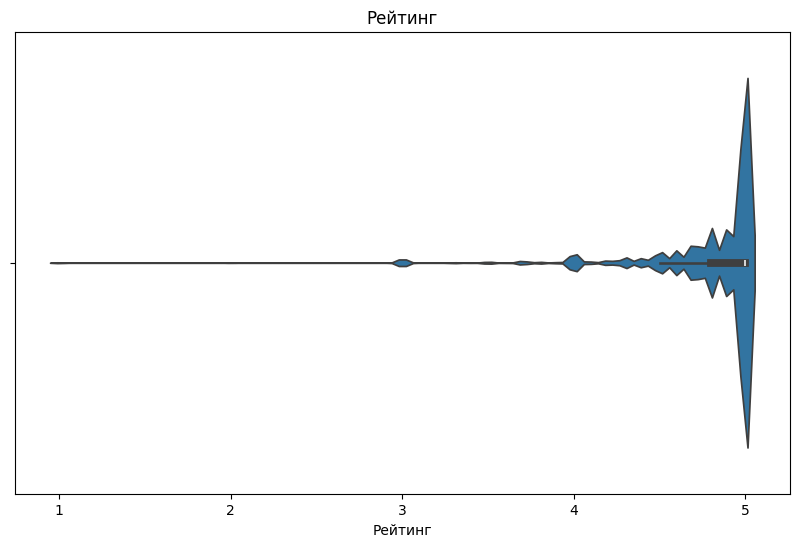

In [10]:
new_df = df.copy()
new_df['Рейтинг'] = df['Рейтинг'].replace(0, pd.NA)

Q1 = new_df['Рейтинг'].quantile(0.25)
Q3 = new_df['Рейтинг'].quantile(0.75)

print('Основная часть покупателей ставит оценки от ', Q1, ' до ', Q3)

plt.figure(figsize=(10, 6))
sns.violinplot(x=new_df['Рейтинг'])
plt.title('Рейтинг')
plt.show()

Основная часть товаров расположена в ценовом диапазоне от  372.0  до  597.0


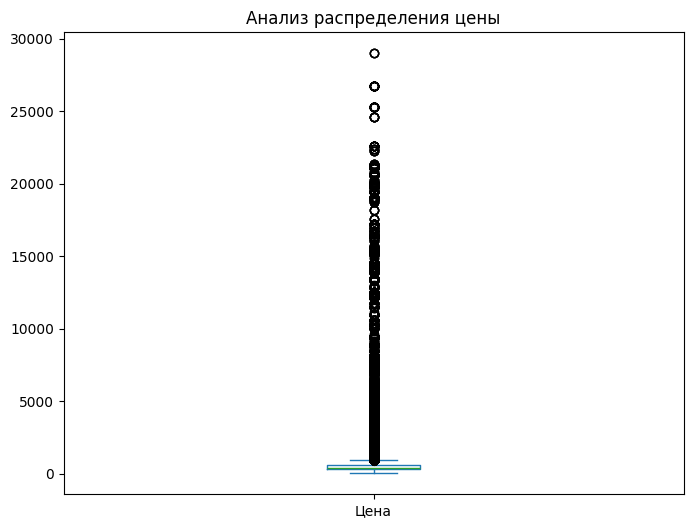

In [11]:
Q1 = df['Цена'].quantile(0.25)
Q3 = df['Цена'].quantile(0.75)

print('Основная часть товаров расположена в ценовом диапазоне от ', Q1, ' до ', Q3)

plt.figure(figsize=(8, 6))
df['Цена'].plot(kind='box')
plt.title('Анализ распределения цены')
plt.show()

Основная часть товаров - бюджетный/средний сегмент, выбросы на графике - скорее всего премиальные товары, удалить их будет ошибкой, они представляют ценность для дальнейшего изучения (можно, например, разделить товары на группы по цене, изучить эти группы по отдельности, какая именно из них приносит больше выгоды: с бо'льшим количеством покупок, но меньшей ценой или с бо'льшей ценой, но меньшим количеством покупок)

5) Визуализируйте пропуски гистограммой. Чем объясняются эти пропуски? Как с ними поступить?

Названия колонок в которых есть пропущенные значения, количество пропущенных значений
Акция           929581
Новинка        1504770
Реклама        1510133
Тип рекламы    1510133
dtype: int64
Названия колонок, процент пропущенных значений
Акция          59.13
Новинка        95.72
Реклама        96.06
Тип рекламы    96.06
dtype: float64


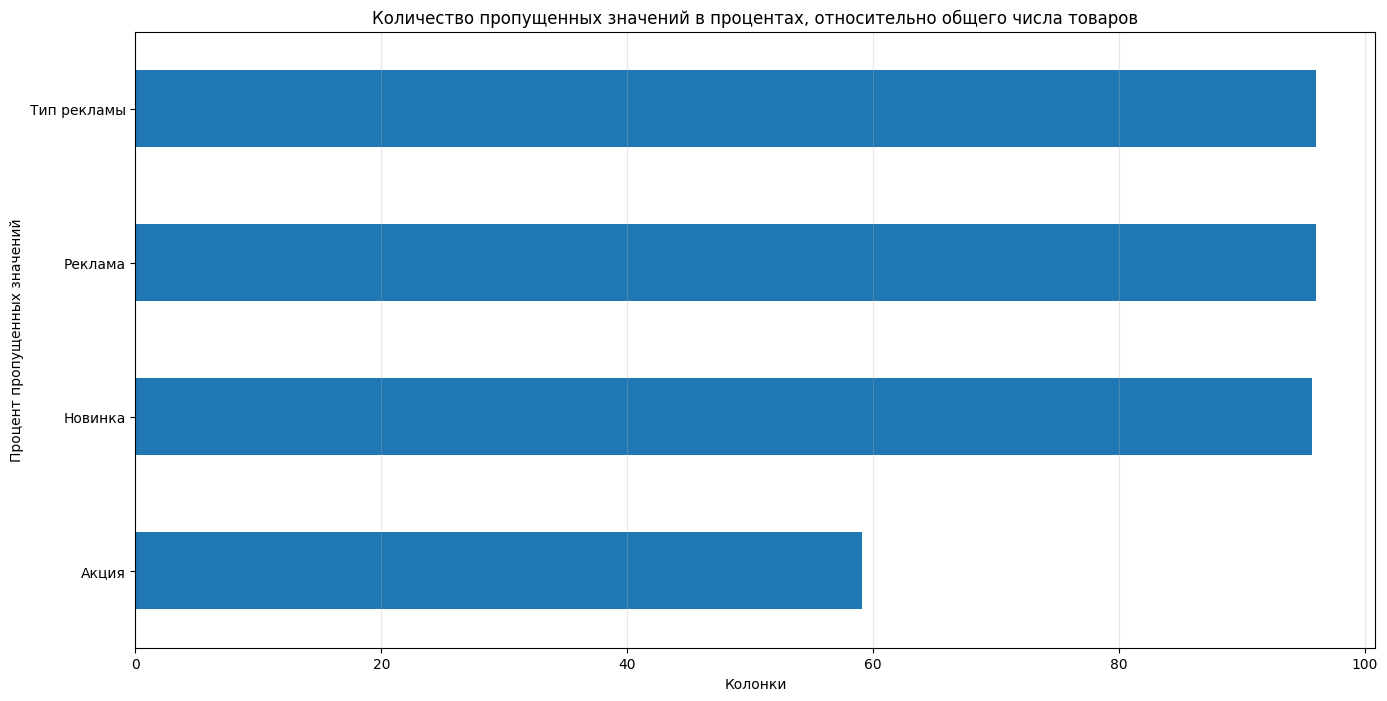

In [12]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values()

missing_values_percent = ((df.isnull().sum() / len(df)) * 100).round(2)
missing_values_percent = missing_values_percent[missing_values_percent > 0].sort_values()

print('Названия колонок в которых есть пропущенные значения, количество пропущенных значений')
print(missing_values)

print('Названия колонок, процент пропущенных значений')
print(missing_values_percent)


plt.figure(figsize=(16, 8))
missing_values_percent.plot(kind='barh')
plt.title('Количество пропущенных значений в процентах, относительно общего числа товаров')
plt.xlabel('Колонки')
plt.ylabel('Процент пропущенных значений')
plt.grid(axis='x', alpha=0.3)
plt.show()

Реклама включена для 4% товаров, столбец "Тип рекламы" напрямую зависит от первого упомянутого столбца: нет рекламы - не может быть и ее типа. Количество пропущенных значений в обоих столбцах одинаковое, значит пропусков в столбце "Тип рекламы" нет. Товары, которым необходима реклама определяются из вне, значит пропуски объясними и не являются странностью в данных.

Статус "Новинка" присваивается только новым товарам, странностей нет.

"Акция" - также, некий флаг: если товар принадлежит к какой либо акции в столбце указывается к какой именно, если же товар не принадлежит ни к одной акции в ячейке появляется пропуск.

Данные пропуски заполнять не имеет смысла, они объяснимы и логичны.

# 2. Визуализация данных

1) Постройте гистограмму(ы), показывающую(ие) распределение места товаров в поисковой выдаче (Выдача) в зависимости от цены (с шагом 50 рублей) для региона Москва.

Не очень поняла, почему просят построить именно гистограмму. Для визуализации выбрала тепловую карту: по моему мнению она позволяет наиболее наглядно показать как зависит место в поисковой выдаче от цены с помощью разных цветов.

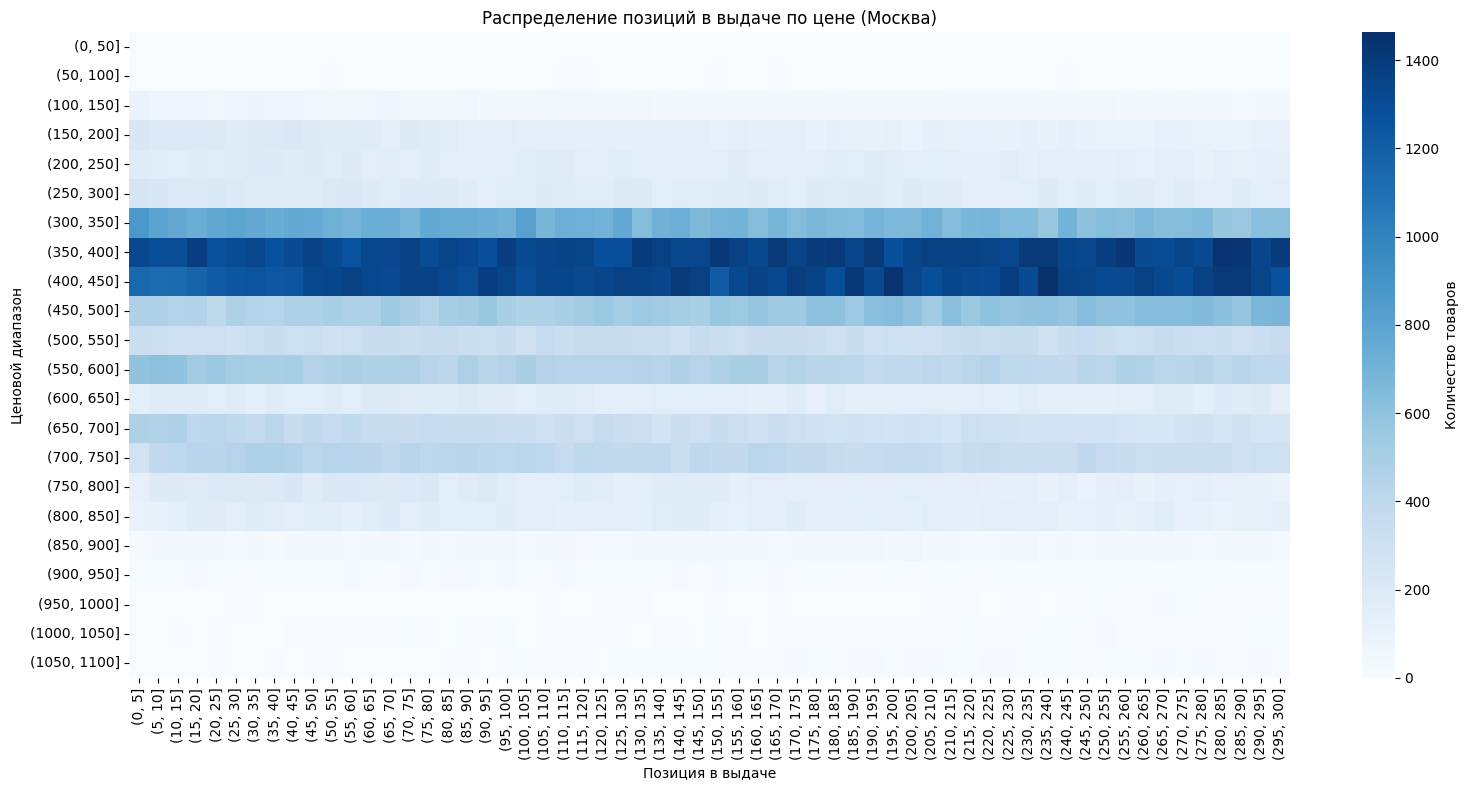

In [13]:
moscow_df = df[df['Регион'] == 'Москва'].copy()

price_bins = np.arange(0, 1100 + 50, 50)
search_bins = np.arange(0, 300 + 5, 5)

heatmap = moscow_df.groupby([
    pd.cut(moscow_df['Цена'], bins=price_bins),
    pd.cut(moscow_df['Выдача'], bins=search_bins)
    #moscow_df['Выдача']
], observed=False).size().unstack().fillna(0)

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap, cmap='Blues', cbar_kws={'label': 'Количество товаров'})
plt.title('Распределение позиций в выдаче по цене (Москва)')
plt.xlabel('Позиция в выдаче')
plt.ylabel('Ценовой диапазон')
plt.tight_layout()
plt.show()

2) Есть ли связь между товарными остатками и позицией в выдаче? Постройте scatter plot, оцените связь

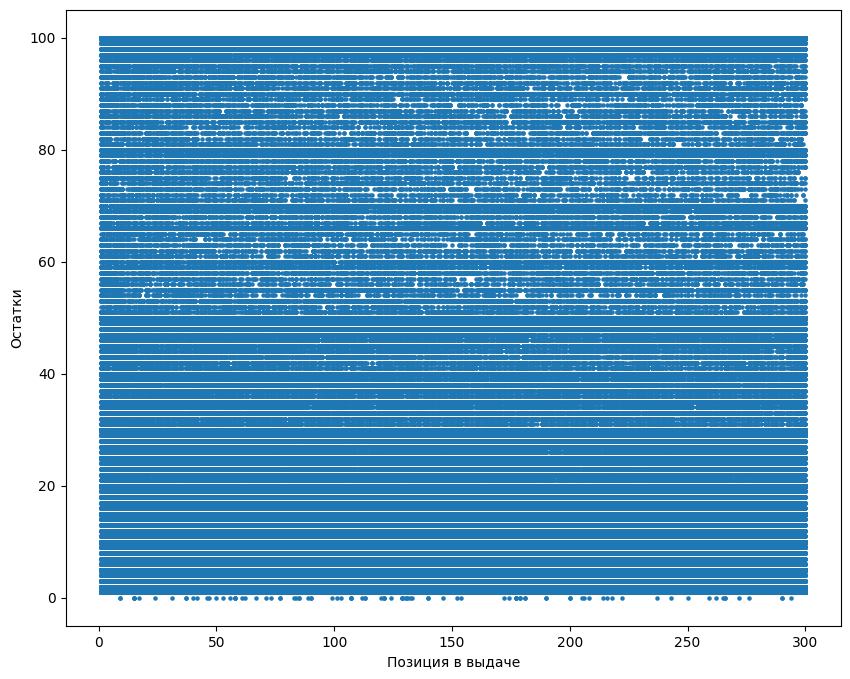

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Выдача'], df['stock_total'], s=5)
plt.xlabel('Позиция в выдаче')
plt.ylabel('Остатки')
plt.show()

Нет прямой зависимости между количеством товара и позиции в выдаче: все позиции в выдаче имеют товары с разным уровнем количества товара. Тут может скрываться небольшая проблема: товары, которых нет в наличии, могут иметь высокие позиции в выдаче.

# 3. Анализ данных

1) Рассчитайте медианную позицию в выдаче по уровням рейтинга

In [15]:
print(df.groupby('level_rating')['Выдача'].median())

level_rating
высокий    124.0
низкий     158.0
средний    143.0
Name: Выдача, dtype: float64


2) Сравните среднюю позицию товаров с одинаковой Номенклатурой в разных регионах. Приведите топ-20 номенклатур с наибольшим расхождением (например, в одном регионе — в топ-3, а в другом — ниже 30-го места).

In [51]:
df_diff = (
    df.groupby(['Номенклатура', 'Регион'])['Выдача'].mean().round(0).reset_index()
      .groupby('Номенклатура')['Выдача'].agg(['min', 'max'])
)
df_diff['Разница'] = df_diff['max'] - df_diff['min']
df_diff = df_diff.sort_values(by='Разница', ascending=False)

df_diff.head(20)

,min,max,Разница
Номенклатура,,,
277048887,5.0,299.0,294.0
386852288,8.0,299.0,291.0
391008726,5.0,293.0,288.0
449772886,10.0,296.0,286.0
235692948,7.0,293.0,286.0
454100670,6.0,292.0,286.0
270034945,14.0,298.0,284.0
417706396,14.0,296.0,282.0
143111390,18.0,300.0,282.0


3) Корреляционный анализ: какие факторы больше всего коррелируют с “Выдача”?

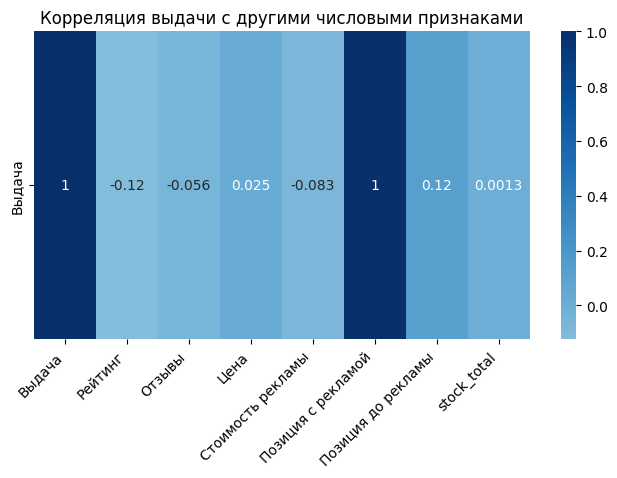

In [48]:
numeric = ['Выдача', 'Рейтинг', 'Отзывы', 'Цена', 'Стоимость рекламы', 'Позиция с рекламой', 'Позиция до рекламы', 'stock_total']
matrix = df[numeric].corr()
matrix = matrix.loc[['Выдача']]

plt.figure(figsize=(8,4))
sns.heatmap(matrix,
            xticklabels=matrix.columns,
            yticklabels=matrix.index,
            cmap='Blues',
            center=0,
            annot=True)

plt.xticks(rotation=45, ha='right')
plt.title('Корреляция выдачи с другими числовыми признаками')
plt.show()


Столбцы "Выдача" и "Позиция с рекламой" полностью совпадают, то есть в столбец выдача идут значения после рекламы, а не до.

Больше всего на выдачу (по тепловой карте) влияет цена, график "Распределение позиций в выдаче по цене (Москва)", который находится выше - подтверждает эту информацию: большинство товаров на всех позициях находятся в определенном ценовом сегменте.

# 4. Бизнес-выводы

Ответьте на вопросы и обоснуйте на основе данных\
4.1 Какие факторы сильнее всего влияют на позицию товара? \
4.2 Почему одинаковый товар может занимать разные позиции в разных регионах? \
4.3 Какие действия вы бы рекомендовали для улучшения позиций? \
4.4 Сформулируйте 1–2 гипотезы, которые можно проверить с помощью A/B-теста на этих данных

4.1 Какие факторы сильнее всего влияют на позицию товара?

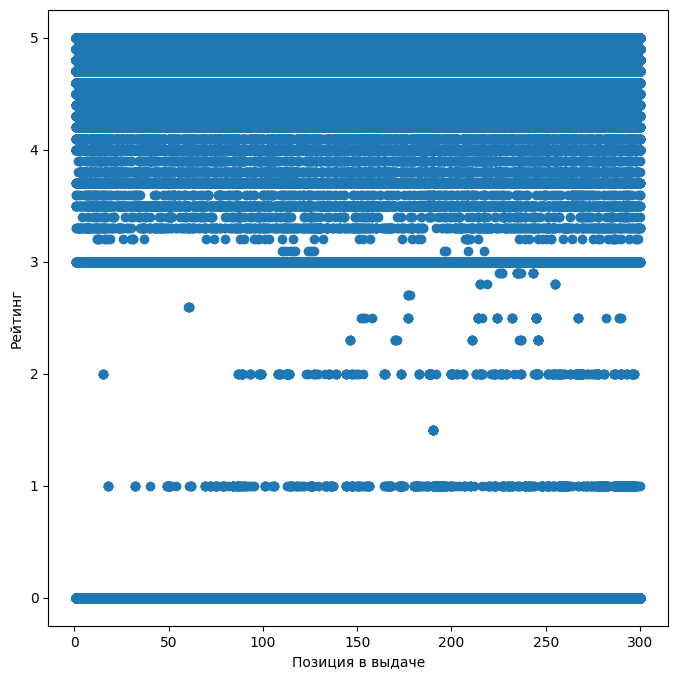

In [45]:
new_df_2 = df[df['Рейтинг'] != 0].copy()
plt.figure(figsize=(8, 8))
plt.scatter(df['Выдача'], df['Рейтинг'])
plt.xlabel('Позиция в выдаче')
plt.ylabel('Рейтинг')
plt.show()

(предполагаю, что "позиция товара" = "Выдача")

Смею предположить, что на выдачу влияет реклама: ее наличие или отстутсвие, какая именно (успешность рекламной компании) и пр. Возможно, некоторые рекламные компанию предполагают вмешательство в выдачу и продвижение определенных товаров.

Очень сильно влияет цена товара, в связи с тем, что пользователи предпочитают определенный ценовой сегмент.

Возможно, на позицию также влияет и рейтинг: товаров с 1 и 2 звездами почти нет в начале рейтинга. С другой стороны, на графике также видно, что товары с 0 рейтингом могут находится на первых позициях в выдаче, так что это скорее спорный момент.

4.2 Почему одинаковый товар может занимать разные позиции в разных регионах?

1) Цена: в Москве взять чехол за 1000 рублей - это нормально, в регионах скорее будут смотреть что-то дешевле.

2) Местная "мода", местный колорит: в разных регионах популярные течения могут быть неоднородны, в связи с этим в условной "реперской" Уфе предпочитают черный цвет и черепы, а в теплом регионе - цветы и пастельные оттенки.    

3) Реклама и акции: возможно, акции или рекламные кампании проводятся для разных регионов, а не для всех одновременно, в связи с этим в одном регионе товар популярен, в другом нет.

4.3 Какие действия вы бы рекомендовали для улучшения позиций?

Не совсем поняла вопрос, предполагаю, что имелось ввиду следующее: какие действия я порекомендовала бы, для того чтобы улучшить систему выдачи?

Для начала стоит посмотреть от чего сейчас зависит выдача товара. Если она строится исключительно на "кликах" пользователей после поиска, то я думаю помимо "кликов" стоит учитывать насколько часто после перехода на страницу товара пользователь делает покупку.

Также, учитывая мое замечание ранее: стоит перемещать в низ выдачи товары, которых нет в наличии (при переходе в корзину покупатель сможет заказать все что добавил, а не увидеть что чего-то нет в наличии).

4.4 Сформулируйте 1–2 гипотезы, которые можно проверить с помощью A/B-теста на этих данных

1) Товары с рекламой занимают позиции в выдаче выше, чем товары без рекламы
  
  A - "Реклама": Not None
  
  B - "Реклама": None

Метрика: сравнение средних показателей "Позиция до рекламы" и "Позиция с рекламой"

2) Товары по акциям занимают позиции выше, чем товары без акции

  A - "Акция": Not None
  
  B - "Акция": None

Метрика: различие средних показателей выдачи у товаров без акции с ней